In [0]:
!pip install scikit-surprise

     |████████████████████████████████| 6.5MB 3.1MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678220 sha256=0215543a631b09f8db44827d705f4c8346d80ef7ea5a7a4831b38f7e84f09633
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
import surprise

surprise.__version__

'1.1.0'

In [0]:
%%bash

mkdir -p data/lastfm/
curl -LO http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-2k.zip
unzip hetrec2011-lastfm-2k.zip -d data/lastfm/
rm -f hetrec2011-lastfm-2k.zip

Archive:  hetrec2011-lastfm-2k.zip
  inflating: data/lastfm/user_friends.dat  
  inflating: data/lastfm/user_taggedartists.dat  
  inflating: data/lastfm/user_taggedartists-timestamps.dat  
  inflating: data/lastfm/artists.dat  
  inflating: data/lastfm/readme.txt  
  inflating: data/lastfm/tags.dat    
  inflating: data/lastfm/user_artists.dat  


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2528k  100 2528k    0     0  5643k      0 --:--:-- --:--:-- --:--:-- 5631k


In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
artist_data = pd.read_csv("./data/lastfm/artists.dat", sep="\t")
artist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17632 entries, 0 to 17631
Data columns (total 4 columns):
id            17632 non-null int64
name          17632 non-null object
url           17632 non-null object
pictureURL    17188 non-null object
dtypes: int64(1), object(3)
memory usage: 551.1+ KB


In [0]:
artist_data.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [0]:
user_artist_plays = pd.read_csv("./data/lastfm/user_artists.dat", sep="\t")
user_artist_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92834 entries, 0 to 92833
Data columns (total 3 columns):
userID      92834 non-null int64
artistID    92834 non-null int64
weight      92834 non-null int64
dtypes: int64(3)
memory usage: 2.1 MB


In [0]:
user_artist_plays.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [0]:
user_tagged_artist = pd.read_csv("./data/lastfm/user_taggedartists.dat", sep="\t")
user_tagged_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186479 entries, 0 to 186478
Data columns (total 6 columns):
userID      186479 non-null int64
artistID    186479 non-null int64
tagID       186479 non-null int64
day         186479 non-null int64
month       186479 non-null int64
year        186479 non-null int64
dtypes: int64(6)
memory usage: 8.5 MB


In [0]:
user_tagged_artist.head()


,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


In [0]:
tag = pd.read_csv("./data/lastfm/tags.dat", sep="\t", encoding='latin-1')
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11946 entries, 0 to 11945
Data columns (total 2 columns):
tagID       11946 non-null int64
tagValue    11946 non-null object
dtypes: int64(1), object(1)
memory usage: 186.8+ KB


In [0]:
tag.head()

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal



### Ejercicio 1 - Análisis Exploratorio de Datos¶
En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:

- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

In [0]:
n_ratings = len(user_artist_plays)
n_artist = user_artist_plays['artistID'].nunique()
n_users = user_artist_plays['userID'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique artist's: {n_artist}")
print(f"Number of unique users: {n_users}")
print(f"Average number of listen per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of listen per artist: {round(n_ratings/n_artist, 2)}")

Number of ratings: 92834
Number of unique artist's: 17632
Number of unique users: 1892
Average number of listen per user: 49.07
Average number of listen per artist: 5.27




#### 1.   Most listened artists  




In [0]:
top_artist = user_artist_plays.groupby(['artistID'])['weight'].sum().reset_index().sort_values('weight', ascending=False).head(10)
artist_data.rename(columns={'id':'artistID'}, inplace=True)
artist_weight_name = pd.merge(top_artist,
                 artist_data[['artistID', 'name']],
                 on='artistID')
artist_weight_name.head(10)

,artistID,weight,name
0,289,2393140,Britney Spears
1,72,1301308,Depeche Mode
2,89,1291387,Lady Gaga
3,292,1058405,Christina Aguilera
4,498,963449,Paramore
5,67,921198,Madonna
6,288,905423,Rihanna
7,701,688529,Shakira
8,227,662116,The Beatles
9,300,532545,Katy Perry


In [0]:
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

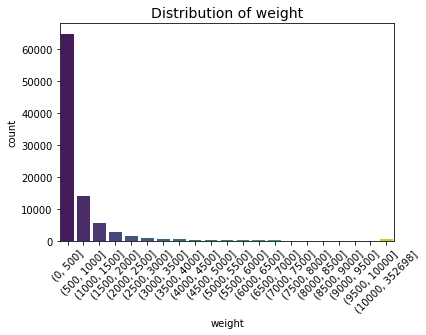

In [0]:
sns.countplot(to_categorical(user_artist_plays.weight, 500, 0, 10000), palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of weight", fontsize=14)
plt.show()



#### 2.   Most listened genre



In [0]:
result = pd.merge(user_tagged_artist,
                 user_artist_plays[['artistID', 'weight','userID']],
                 on=['artistID','userID'])

top_tag = result.groupby(['tagID'])['weight'].sum().reset_index().sort_values('weight', ascending=False).head(10)
result_tag = pd.merge(top_tag,
                 tag[['tagID', 'tagValue']],
                 on='tagID')
result_tag.head(10)

,tagID,weight,tagValue
0,24,6208564,pop
1,73,5081342,rock
2,130,4336277,female vocalists
3,18,3422492,electronic
4,39,3406754,dance
5,79,3057909,alternative
6,127,1966193,seen live
7,209,1900868,legend
8,238,1838856,sexy
9,78,1823838,alternative rock


Text(0, 0.5, 'Género')

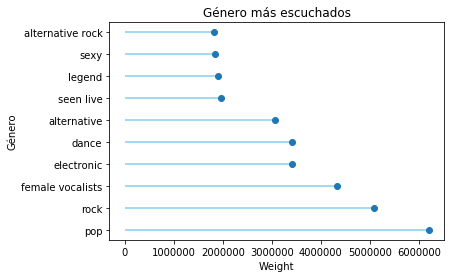

In [0]:
plt.hlines(y=result_tag.tagValue, xmin=0, xmax=result_tag['weight'], color='skyblue')
plt.plot(result_tag['weight'], result_tag.tagValue, "o")
plt.title("Género más escuchados")
plt.xlabel('Weight')
plt.ylabel('Género')

#### Ratings Distribution

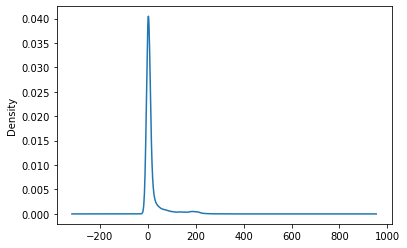

In [0]:
user_artist_plays['weight'].value_counts().sort_index(ascending=False).plot(kind='kde')


In [0]:
user_artist_plays['weight'].value_counts().sort_index(ascending=False)

352698      1
324663      1
320725      1
257978      1
227829      1
         ... 
5         318
4         345
3         338
2         419
1         636
Name: weight, Length: 5436, dtype: int64

La mayoria de las canciones de los artistas han sido escuchadas entre 0 y 50 veces

#### Ratings Distribution By Artist


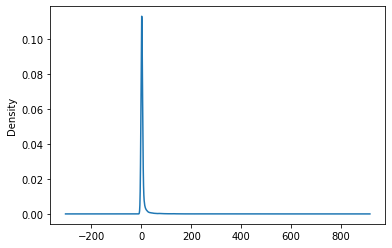

In [0]:
user_artist_plays.groupby('artistID')['weight'].count().plot(kind='kde')


In [0]:
user_artist_plays.groupby('artistID')['weight'].count()

artistID
1         3
2        12
3         3
4         2
5         2
         ..
18741     1
18742     1
18743     1
18744     1
18745     1
Name: weight, Length: 17632, dtype: int64

La mayoria de los artistas han sido escuchados entre 0 y 50 veces.

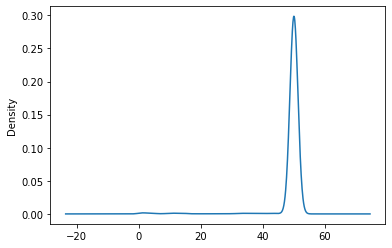

In [0]:
user_artist_plays.groupby('userID')['weight'].count().plot(kind='kde')

In [0]:
user_artist_plays.groupby('userID')['weight'].sum()[2]

168737

### Normalizacion

rating user/ suma de todos los rating del usuario

In [0]:
def normalizar(user_artist_plays):
    user_artist_plays['weight'] = user_artist_plays.apply(lambda row: row['weight']/user_artist_plays.groupby('userID')['weight'].sum()[row['userID']], axis =  1)
    return user_artist_plays

Rating usuario - media de todos los rating del usuario 

In [0]:
def normalizar_libro(user_artist_plays):
    user_artist_plays['weight'] = user_artist_plays.apply(lambda row: row['weight']/user_artist_plays.groupby('userID')['weight'].mean()[row['userID']], axis =  1)
    return user_artist_plays

La mayoria de los usuarios han esuchado entre 40 y 60 temas.

In [0]:
normalizar_libro(user_artist_plays)

,userID,artistID,weight
0,2,51,1.176307
1,2,52,0.930820
2,2,53,0.892872
3,2,54,NaN
4,2,55,NaN
...,...,...,...
92829,2100,18726,NaN
92830,2100,18727,NaN
92831,2100,18728,NaN
92832,2100,18729,NaN


In [0]:
user_artist_plays[:3]

,userID,artistID,weight
0,2,51,10508.26
1,2,52,8315.26
2,2,53,7976.26


## Ejercicio 2

In [0]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userID'].nunique()
    N = df['artistID'].nunique()

    user_mapper = dict(zip(np.unique(df["userID"]), list(range(M))))
    artist_mapper = dict(zip(np.unique(df["artistID"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userID"])))
    artist_inv_mapper = dict(zip(list(range(N)), np.unique(df["artistID"])))
    
    user_index = [user_mapper[i] for i in df['userID']]
    item_index = [artist_mapper[i] for i in df['artistID']]

    X = csr_matrix((df["weight"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper

X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper = create_X(user_artist_plays)

In [0]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.28%


In [0]:
n_listened_per_user = X.getnnz(axis=1)

print(f"Most active user listened {n_listened_per_user.max()} artists.")
print(f"Least active user listened {n_listened_per_user.min()} artists.")

Most active user listened 50 artists.
Least active user listened 1 artists.


In [0]:
n_listened_per_artist = X.getnnz(axis=0)

print(f"Most listened artist has {n_listened_per_artist.max()} listen.")
print(f"Least listened artist has {n_listened_per_artist.min()} listed.")

Most listened artist has 611 listen.
Least listened artist has 1 listed.


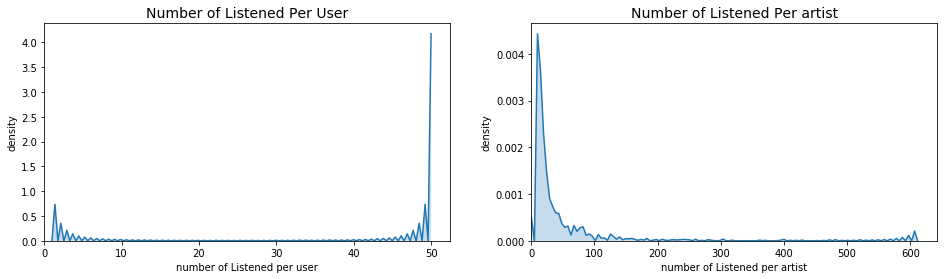

In [0]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_listened_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Listened Per User", fontsize=14)
plt.xlabel("number of Listened per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_listened_per_artist, shade=True)
plt.xlim(0)
plt.title("Number of Listened Per artist", fontsize=14)
plt.xlabel("number of Listened per artist")
plt.ylabel("density")
plt.show()

## Ejercicio 3  Surprise

In [0]:
import io  # needed because of weird encoding of u.item file

from surprise import KNNBaseline
from surprise import Dataset
from surprise import get_dataset_dir
from surprise import Reader, Dataset

def read_item_names():
    """Read the u.item file from MovieLens 100-k dataset and return two
    mappings to convert raw ids into movie names and movie names into raw ids.
    """
    artist_data = pd.read_csv("./data/lastfm/artists.dat", sep="\t")
    
    rid_to_name = {}
    name_to_rid = {}
    
    for index, line in artist_data.iterrows():
        rid_to_name[line['id']] = line['name']
        name_to_rid[line['name']] = line['id']

    return rid_to_name, name_to_rid

def get_top_n(artist_name , k = 10):

    # First, train the algortihm to compute the similarities between items
    reader = Reader()
    user_artist_plays = pd.read_csv("./data/lastfm/user_artists.dat", sep="\t")
    user_artist_plays = normalizar(user_artist_plays)
    data = Dataset.load_from_df(user_artist_plays[['userID', 'artistID', 'weight']], reader)
    trainset = data.build_full_trainset()
    sim_options = {'name': 'pearson_baseline', 'user_based': False}
    algo = KNNWithMeans(sim_options=sim_options)
    algo.fit(trainset)

    # Read the mappings raw id <-> movie name
    rid_to_name, name_to_rid = read_item_names()

    
    artist_raw_id = name_to_rid[artist_name]
    artist_inner_id = algo.trainset.to_inner_iid(artist_raw_id)

    
    artist_neighbors = algo.get_neighbors(artist_inner_id, k=10)

    # Convert inner ids of the neighbors into names.
    artist_neighbors = (algo.trainset.to_raw_iid(inner_id)
                          for inner_id in artist_neighbors)
    artist_neighbors = (rid_to_name[rid]
                          for rid in artist_neighbors)

    print()
    print('The 10 nearest neighbors of {} are:', artist_name)
    for artit in artist_neighbors:
        print(artit)

In [0]:
get_top_n('David Bowie')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

The 10 nearest neighbors of {} are: David Bowie
Coldplay
Led Zeppelin
Vampire Weekend
Genesis
Avril Lavigne
Alice in Chains
Katy Perry
Bauhaus
Talking Heads
Eminem


## Ejercio 4  

### Version basada en matriz

In [0]:
from sklearn.neighbors import NearestNeighbors

def find_similar_artist(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.
    
    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [0]:
artist_data = pd.read_csv("./data/lastfm/artists.dat", sep="\t")
artist_id_title = dict(zip(artist_data['id'], artist_data['name']))
artist_titles_id = dict(zip(artist_data['name'], artist_data['id']))

user_artist_plays = pd.read_csv("./data/lastfm/user_artists.dat", sep="\t")
user_artist_plays = normalizar(user_artist_plays)
X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper = create_X(user_artist_plays)

artist_name = 'David Bowie'
artist_id = artist_titles_id[artist_name]

similar_artist = find_similar_artist(artist_id, X, artist_mapper, artist_inv_mapper, metric='cosine', k=10)
artist_title = artist_id_title[artist_id]

print(f"Because you listened {artist_title}:")
for i in similar_artist:
    print(artist_id_title[i])

Because you listened David Bowie:
Flea
Soan
Gail Ann Dorsey
David Bowie &Moby
Minuscule Hey
Tin Machine
M
Charlie Winston
Revolver


### Version Surprise

In [0]:
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [0]:
reader = Reader()
user_artist_plays = pd.read_csv("./data/lastfm/user_artists.dat", sep="\t")
user_artist_plays = normalizar_libro(user_artist_plays)
data = Dataset.load_from_df(user_artist_plays[['userID', 'artistID', 'weight']], reader)
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,1.705974,0.189569,0.241748
SlopeOne,1.709780,9.287261,1.109745
SVD,1.728671,3.975567,0.264393
KNNBasic,1.731093,0.332616,2.871050
SVDpp,1.738635,33.981200,1.669121
KNNBaseline,1.740936,0.604582,3.440248
CoClustering,1.742112,3.083162,0.197089
KNNWithMeans,1.751181,0.413439,3.287416
KNNWithZScore,1.814248,0.483293,3.230880


In [0]:

surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')


In [0]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
KNNWithMeans,0.980331,0.338681,2.880849
SlopeOne,0.980331,6.765261,1.029757
KNNWithZScore,0.980331,0.447561,3.083827
BaselineOnly,0.980331,0.227030,0.311371
SVDpp,0.980331,33.636494,1.575628
SVD,0.980331,3.925856,0.347363
NormalPredictor,0.980331,0.110242,0.358131
CoClustering,0.980331,2.668754,0.277465
KNNBasic,0.980331,0.302626,2.775601


## WEB

### Scrap de imagen update url



```
for records in tqdm(user_artist):
        webapp.logger.info(records.url)
        response = requests.get(url = records.url)
        soup = BeautifulSoup(response.text, "html.parser")
        
        one_a_tag = soup.find_all("meta", property="og:image")
        url = one_a_tag[0]
        link = url['content']
        
        webapp.logger.info(link)    

        db.session.query(model.Artist).\
           filter(model.Artist.id==records.id).update({"picture_id": link})
        db.session.commit()
```



### code for deploy

In [0]:
import os
import time
import numpy as np
# data science imports
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import datetime
import sqlite3


class KnnRecommender:
    """
    This is an item-based collaborative filtering recommender with
    KNN implmented by sklearn
    """
    def __init__(self, path_user_artist, path_artist):
        print(datetime.datetime.now(),'\tINFO\tContructor')
        """
        Recommender requires path to data: movies data and ratings data
        Parameters
        ----------
        path_movies: str, movies data file path
        path_ratings: str, ratings data file path
        """
        self.path_user_artist = path_user_artist
        self.path_artist = path_artist
        self.model = NearestNeighbors()

    def set_model_params(self, n_neighbors, algorithm, metric, n_jobs=None):
        """
        set model params for sklearn.neighbors.NearestNeighbors
        Parameters
        ----------
        n_neighbors: int, optional (default = 5)
        algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, optional
        metric: string or callable, default 'minkowski', or one of
            ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
        n_jobs: int or None, optional (default=None)
        """
        print(datetime.datetime.now(), '\tINFO\tset_model_params')
        self.n_neighbors = n_neighbors
        if n_jobs and (n_jobs > 1 or n_jobs == -1):
            os.environ['JOBLIB_TEMP_FOLDER'] = '/tmp'
        self.model.set_params(**{
            'n_neighbors': n_neighbors,
            'algorithm': algorithm,
            'metric': metric,
            'n_jobs': n_jobs})
        
    def create_X(self, df):
        print(datetime.datetime.now(),'\tINFO\tcreate_X')
        M = df['userID'].nunique()
        N = df['artistID'].nunique()

        user_mapper = dict(zip(np.unique(df["userID"]), list(range(M))))
        artist_mapper = dict(zip(np.unique(df["artistID"]), list(range(N))))
        
        user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userID"])))
        artist_inv_mapper = dict(zip(list(range(N)), np.unique(df["artistID"])))
        
        user_index = [user_mapper[i] for i in df['userID']]
        item_index = [artist_mapper[i] for i in df['artistID']]

        X = csr_matrix((df["weight"], (user_index,item_index)), shape=(M,N))
        
        return X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper

    def normalizar(self, X):
        print(datetime.datetime.now(),'\tINFO\tnormalizar')
        sum_ratings_per_artist = X.sum(axis=0)
        n_listened_per_artist = X.getnnz(axis=0)
        mean_rating_per_artist = sum_ratings_per_artist/n_listened_per_artist
        X_mean_artist = np.tile(mean_rating_per_artist, (X.shape[0],1))
        return X - csr_matrix(X_mean_artist)

    def _prep_data(self):
        """
        prepare data for recommender
        1. movie-user scipy sparse matrix
        2. hashmap of movie to row index in movie-user scipy sparse matrix
        """
        print(datetime.datetime.now(), '\tINFO\t_prep_data')
        # read data
        df_user_artist = pd.read_csv(
            os.path.join(self.path_user_artist), sep="\t")
        df_user_artist['weight'] = df_user_artist.apply(lambda row: row['weight']/df_user_artist.groupby('userID')['weight'].sum()[row['userID']], axis =  1)
        
        df_artist = pd.read_csv(
            os.path.join(self.path_artist), sep="\t")
        
        artist_titles = dict(zip(df_artist['id'], df_artist['name']))
        # transform matrix to scipy sparse matrix
        X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper = self.create_X(df_user_artist)

        X_norm = self.normalizar(X)

        return X_norm, artist_titles, artist_mapper,artist_inv_mapper


    

    def make_recommendations(self, artist_id, n_recommendations):
        """
        make top n movie recommendations
        Parameters
        ----------
        fav_movie: str, name of user input movie
        n_recommendations: int, top n recommendations
        """
        print(datetime.datetime.now(),'\tINFO\tmake_recommendations')
        # get data
        artist_user_mat_sparse, artist, artist_mapper,artist_inv_mapper = self._prep_data()

        similar_artist = self.find_similar_artist(artist_id, artist_user_mat_sparse, artist_mapper, artist_inv_mapper)

        artist_title = artist[artist_id]
        hora = datetime.datetime.now()
        print("{hora}\tINFO\tBecause you listened {artist_title}:")
        artist_list = []
        for i in similar_artist:
            artist_list.append(artist[i])
        return similar_artist

    def find_similar_artist(self, movie_id, X, artist_mapper, artist_inv_mapper):
        """
        Finds k-nearest neighbours for a given movie id.
        
        Args:
            movie_id: id of the movie of interest
            X: user-item utility matrix
            k: number of similar movies to retrieve
            metric: distance metric for kNN calculations
        
        Output: returns list of k similar movie ID's
        """
        print(datetime.datetime.now(),'\tINFO\tfind_similar_artist')
        X = X.T
        neighbour_ids = []
        
        movie_ind = artist_mapper[movie_id]
        movie_vec = X[movie_ind]
        if isinstance(movie_vec, (np.ndarray)):
            movie_vec = movie_vec.reshape(1,-1)
        # use k+1 since kNN output includes the movieId of interest
        self.model.fit(X)
        neighbour = self.model.kneighbors(movie_vec, return_distance=False)
        for i in range(0,self.n_neighbors):
            n = neighbour.item(i)
            neighbour_ids.append(artist_inv_mapper[n])
        neighbour_ids.pop(0)
        return neighbour_ids



def save_db(conn, artist_id, recommende_list):
    print(datetime.datetime.now(),'\tINFO\tsave_db')
    cursorObj = conn.cursor()  
    for each in range(0,len(recommende_list)):
      entities = (artist_id,each,  int(recommende_list[each]))
      cursorObj.execute('INSERT INTO recommendation(artist_id,orden ,recommended_artist_id) VALUES(?, ?,?)', entities)
      conn.commit()  

    

def main():
    # get args
    print(datetime.datetime.now(), '\tINFO\tSTART')
    #conn = sqlite3.connect('database.db')
    data_path = './data/lastfm/'
    user_artist_plays = "user_artists.dat"
    artist = "artists.dat"
    top_n = 10

    df_artist = pd.read_csv(os.path.join('./data/lastfm/' + artist), sep="\t")
    
    
    #for artist_id in df_artist['id'][:3]:
    artist_id = 641
    # initial recommender system
    recommender = KnnRecommender(
        os.path.join(data_path, user_artist_plays),
        os.path.join(data_path, artist))
    # set params
    recommender.set_model_params(top_n+1, 'brute', 'cosine', -1)
    # make recommendations
    artistas = recommender.make_recommendations(artist_id, top_n)
    #save_db(conn, artist_id, artistas)
    print(datetime.datetime.now(),'\tINFO\t', artistas)

    

In [0]:
main()

2019-11-20 00:37:56.536546 	INFO	START
2019-11-20 00:37:56.580477 	INFO	Contructor
2019-11-20 00:37:56.580839 	INFO	set_model_params
2019-11-20 00:37:56.581329 	INFO	make_recommendations
2019-11-20 00:37:56.581588 	INFO	_prep_data
2019-11-20 00:44:50.232211 	INFO	create_X
2019-11-20 00:44:50.328031 	INFO	normalizar
2019-11-20 00:44:51.664834 	INFO	find_similar_artist
{hora}	INFO	Because you listened {artist_title}:
2019-11-20 00:44:53.630807 	INFO	 [6119, 14536, 14539, 14541, 14535, 14537, 14538, 3303, 12959, 2065]
